In [ ]:
import tensorflow as tf
import math
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('./data/1hourTS.csv')
print(df.dtypes)

# setindex = df['Date/Time']
# temp2 = df['Temperature']

# print(temp2.head())
# log_temp = [math.log(i) for i in temp2]
# print(log_temp)

# newtemp = pd.DataFrame(log_temp, index=setindex, columns=['Temperature'])
# print(newtemp.head())
# print(newtemp.dtypes)

df.set_index('Date/Time',inplace=True)
# print(df.head(5))
temp = df['Temperature']
bp1 = df['Sys']
bp2 = df['Dias']
bpm = df['BPM']

# print(temp.head(5))
# print(bp1.head(5))
# print(bp2.head(5))
# print(bpm.head(5))





Date/Time           object
Air Temperature      int64
Temperature        float64
BPM                float64
Sys                float64
Dias               float64
Activity            object
dtype: object


In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X2, y2 = df_to_X_y(bp1, WINDOW_SIZE)
X3, y3 = df_to_X_y(bp2, WINDOW_SIZE)
X4, y4 = df_to_X_y(bpm, WINDOW_SIZE)
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X4.shape, y4.shape)

NameError: name 'df_to_X_y' is not defined

In [ ]:
#WINDOW_SIZE = 6
#X4, y4 = df_to_X_y(bpm, WINDOW_SIZE)

In [ ]:
X1_train = X1[0:500]
y1_train = y1[0:500]
X1_val = X1[500:610] 
y1_val = y1[500:610]
X1_test = X1[610:717]
y1_test = y1[610:717]
X2_train = X2[0:500]
y2_train = y2[0:500]
X2_val = X2[500:610]
y2_val = y2[500:610]
X2_test = X2[610:717]
y2_test = y2[610:717]
X3_train = X3[0:500]
y3_train = y3[0:500]
X3_val = X3[500:610]
y3_val = y3[500:610]
X3_test = X3[610:717]
y3_test = y3[610:717]
X4_train = X4[0:500] 
y4_train = y4[0:500]
X4_val = X4[500:610]
y4_val = y4[500:610]
X4_test = X4[610:717]
y4_test = y4[610:717]

print(X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape)
print(X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape)
print(X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape)
print(X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape)


(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)
(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)
(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)
(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)


Noramalize Data Impelmentation

In [ ]:
newtemp = temp.apply(np.log)
print(newtemp.head())


Date/Time
7/1/2022 0:00    3.589535
7/1/2022 1:00    3.589851
7/1/2022 2:00    3.587598
7/1/2022 3:00    3.587105
7/1/2022 4:00    3.587486
Name: Temperature, dtype: float64


In [ ]:
WINDOW_SIZE = 3
X5, y5 = df_to_X_y(newtemp, WINDOW_SIZE)
print(X5.shape, y5.shape)

(717, 3, 1) (717,)


In [ ]:
X5_train = X5[0:500] 
y5_train = y5[0:500]
X5_val = X5[500:610]
y5_val = y5[500:610]
X5_test = X5[610:717]
y5_test = y5[610:717]
print(X5_train.shape, y5_train.shape, X5_val.shape, y5_val.shape, X5_test.shape, y5_test.shape)

(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)


In [ ]:
tempmodel = Sequential()
tempmodel.add(LSTM(86, activation='LeakyReLU', input_shape=(3, 1), return_sequences=False))
#model1.add(LSTM(64, activation='LeakyReLU', return_sequences=True))
#model.add(Dropout(0.1))
tempmodel.add(Dense(1))
tempmodel.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
tempmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 86)                30272     
                                                                 
 dense (Dense)               (None, 1)                 87        
                                                                 
Total params: 30,359
Trainable params: 30,359
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = tempmodel.fit(X5_train, y5_train, validation_data=(X5_val, y5_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 6s 81ms/step - loss: 11.7831 - root_mean_squared_error: 3.4327 - val_loss: 10.0106 - val_root_mean_squared_error: 3.1640
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 8.3543 - root_mean_squared_error: 2.8904 - val_loss: 6.1848 - val_root_mean_squared_error: 2.4869
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 3.9242 - root_mean_squared_error: 1.9810 - val_loss: 1.1638 - val_root_mean_squared_error: 1.0788
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3286 - root_mean_squared_error: 0.5733 - val_loss: 0.2970 - val_root_mean_squared_error: 0.5450
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0757 - root_mean_squared_error: 0.2751 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2194
Epoch 6/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0201 - root_mean_squared_error: 0.1417 - val_loss: 0.0038 - val

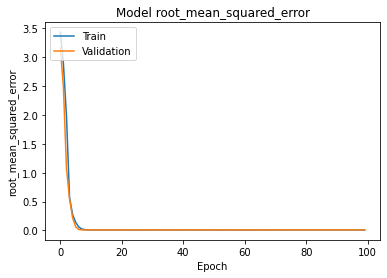

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

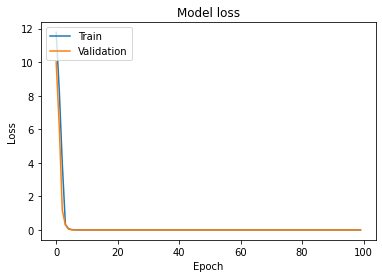

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 [==============================] - 0s 3ms/step


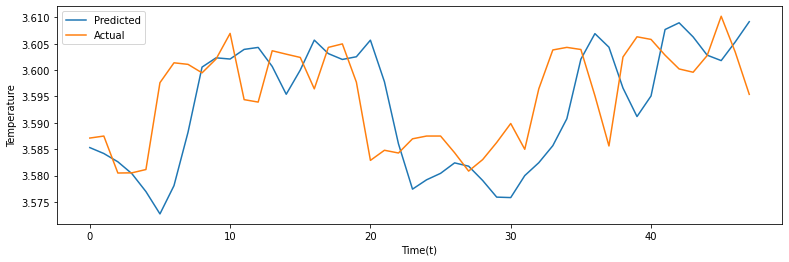

In [ ]:
# m1 = load_model(r"D:\dataset_fyp\lstm_models\temp1.h5")
tempmodel.evaluate(X5_val,y5_val)
Temp_train_predictions = tempmodel.predict(X5_train).flatten()
Temp_train_results = pd.DataFrame(data={'Train Predictions':Temp_train_predictions, 'Actuals':y5_train})
Temp_train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(Temp_train_results['Train Predictions'][0:48])
plt.plot(Temp_train_results['Actuals'][0:48])
plt.legend(['Predicted','Actual'])

In [ ]:
Temp_range = abs(Temp_train_predictions - y5_train)
print("Temperature Ranges")
print("Min Temp Diff",Temp_range.min())
print("Max Temp Diff",Temp_range.max())
print("Mean Temp Diff",Temp_range.mean())

Temperature Ranges
Min Temp Diff 4.0295235854692635e-06
Max Temp Diff 0.030029935239579864
Mean Temp Diff 0.007600694360035353


In [ ]:
newbp1 = bp1.apply(np.log)
print(newbp1.head())

Date/Time
7/1/2022 0:00    4.615121
7/1/2022 1:00    4.634729
7/1/2022 2:00    4.624973
7/1/2022 3:00    4.624973
7/1/2022 4:00    4.634729
Name: Sys, dtype: float64


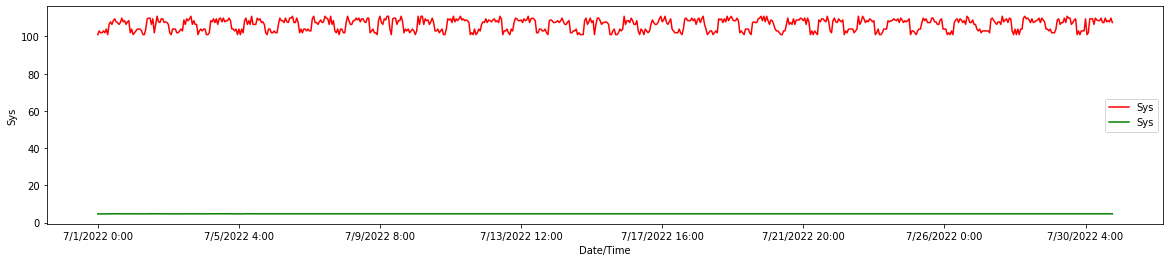

In [ ]:
plt.figure(figsize=(20,4)) 
plt.xlabel("Date-Time")
plt.ylabel("Sys")
bp1.plot(color='red')
# plt.figure(figsize=(20,4)) 
newbp1.plot(color='green')
plt.legend()

In [ ]:
WINDOW_SIZE = 3
X6, y6 = df_to_X_y(newbp1, WINDOW_SIZE)
print(X6.shape, y6.shape)

(717, 3, 1) (717,)


In [ ]:
X6_train = X6[0:500] 
y6_train = y6[0:500]
X6_val = X6[500:610]
y6_val = y6[500:610]
X6_test = X6[610:717]
y6_test = y6[610:717]
print(X6_train.shape, y6_train.shape, X6_val.shape, y6_val.shape, X6_test.shape, y6_test.shape)

(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)


In [ ]:
# bp1model = Sequential()
# bp1model.add(LSTM(86, activation='LeakyReLU', input_shape=(3, 1), return_sequences=False))
# #model1.add(LSTM(64, activation='LeakyReLU', return_sequences=True))
# #model.add(Dropout(0.1))
# bp1model.add(Dense(1))
# bp1model.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bp1model.summary()

bp1model = Sequential()
bp1model.add(LSTM(86, activation='ReLU', input_shape=(3, 1), return_sequences=True))
bp1model.add(LSTM(64, activation='ReLU', return_sequences=True))
bp1model.add(LSTM(32, activation='ReLU', return_sequences=True))
bp1model.add(LSTM(16, activation='ReLU', return_sequences=False))
bp1model.add(Dense(1))
bp1model.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
bp1model.summary()

# bp1model = Sequential()
# bp1model.add(LSTM(100, activation='ReLU', input_shape=(3, 1), return_sequences=True))
# bp1model.add(LSTM(64, activation='ReLU', return_sequences=True))
# bp1model.add(LSTM(32, activation='ReLU', return_sequences=False))
# bp1model.add(Dense(1))
# bp1model.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bp1model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 86)             30272     
                                                                 
 lstm_2 (LSTM)               (None, 3, 64)             38656     
                                                                 
 lstm_3 (LSTM)               (None, 3, 32)             12416     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 84,497
Trainable params: 84,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = bp1model.fit(X6_train, y6_train, validation_data=(X6_val, y6_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 16s 167ms/step - loss: 21.2905 - root_mean_squared_error: 4.6142 - val_loss: 20.4708 - val_root_mean_squared_error: 4.5245
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 17.2418 - root_mean_squared_error: 4.1523 - val_loss: 6.0411 - val_root_mean_squared_error: 2.4579
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 1.3021 - root_mean_squared_error: 1.1411 - val_loss: 0.3524 - val_root_mean_squared_error: 0.5936
Epoch 4/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1100 - root_mean_squared_error: 0.3316 - val_loss: 0.0939 - val_root_mean_squared_error: 0.3064
Epoch 5/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0276 - root_mean_squared_error: 0.1661 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0058 -

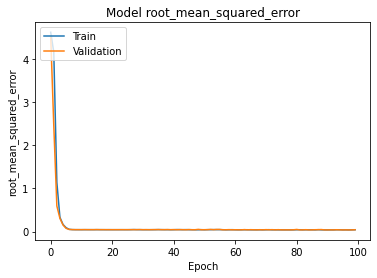

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

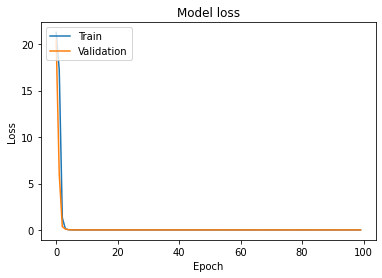

In [ ]:
plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 [==============================] - 2s 5ms/step


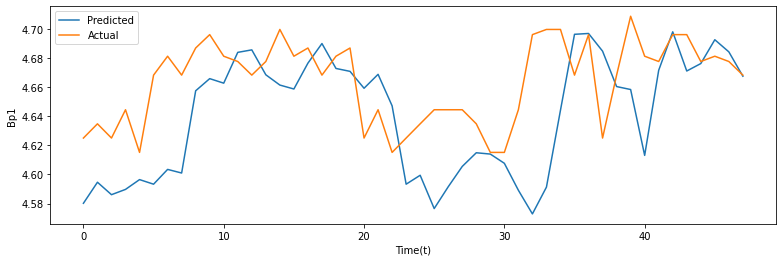

In [ ]:
# m1 = load_model(r"D:\dataset_fyp\lstm_models\temp1.h5")
bp1model.evaluate(X6_val,y6_val)
BP1_train_predictions = bp1model.predict(X6_train).flatten()
BP1_train_results = pd.DataFrame(data={'Train Predictions':BP1_train_predictions, 'Actuals':y6_train})
BP1_train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Bp1")
plt.plot(BP1_train_results['Train Predictions'][0:48])
plt.plot(BP1_train_results['Actuals'][0:48])
plt.legend(['Predicted','Actual'])

In [ ]:
bp1_range = abs(BP1_train_predictions - y6_train)
print("Bp1 Ranges")
print("Min Bp1 Diff",bp1_range.min())
print("Max Bp1 Diff",bp1_range.max())
print("Mean Bp1 Diff",bp1_range.mean())

Bp1 Ranges
Min Bp1 Diff 0.0005290514152376247
Max Bp1 Diff 0.12300661102413368
Mean Bp1 Diff 0.03232321171756721


In [ ]:
newbp2 = bp2.apply(np.log)
print(newbp2.head())

Date/Time
7/1/2022 0:00    4.189655
7/1/2022 1:00    4.204693
7/1/2022 2:00    4.189655
7/1/2022 3:00    4.174387
7/1/2022 4:00    4.189655
Name: Dias, dtype: float64


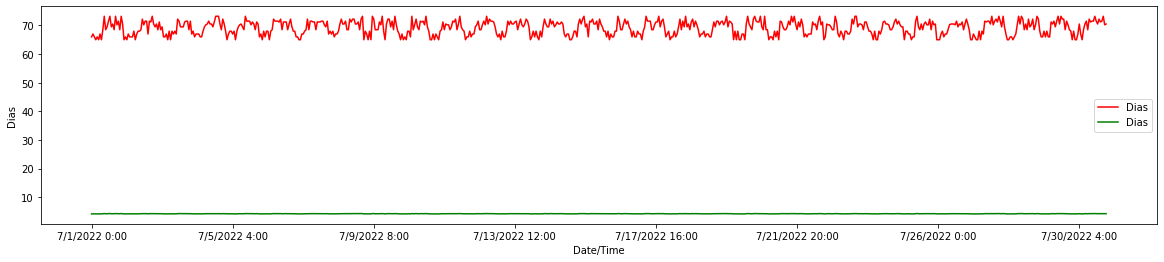

In [ ]:
plt.figure(figsize=(20,4)) 
plt.xlabel("Date-Time")
plt.ylabel("Dias")
bp2.plot(color='red')
# plt.figure(figsize=(20,4)) 
newbp2.plot(color='green')
plt.legend()

In [ ]:
WINDOW_SIZE = 3
X7, y7 = df_to_X_y(newbp2, WINDOW_SIZE)
print(X7.shape, y7.shape)

(717, 3, 1) (717,)


In [ ]:
X7_train = X7[0:500] 
y7_train = y7[0:500]
X7_val = X7[500:610]
y7_val = y7[500:610]
X7_test = X7[610:717]
y7_test = y7[610:717]
print(X7_train.shape, y7_train.shape, X7_val.shape, y7_val.shape, X7_test.shape, y7_test.shape)

(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)


In [ ]:
# bp2model = Sequential()
# bp2model.add(LSTM(86, activation='LeakyReLU', input_shape=(3, 1), return_sequences=False))
# #model1.add(LSTM(64, activation='LeakyReLU', return_sequences=True))
# #model.add(Dropout(0.1))
# bp2model.add(Dense(1))
# bp2model.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bp2model.summary()

bp2model = Sequential()
bp2model.add(LSTM(100, activation='ReLU', input_shape=(3, 1), return_sequences=True))
bp2model.add(LSTM(64, activation='ReLU', return_sequences=True))
bp2model.add(LSTM(32, activation='ReLU', return_sequences=False))
bp2model.add(Dense(1))
bp2model.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
bp2model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3, 100)            40800     
                                                                 
 lstm_6 (LSTM)               (None, 3, 64)             42240     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 95,489
Trainable params: 95,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = bp2model.fit(X7_train, y7_train, validation_data=(X7_val, y7_val), epochs=200)

Epoch 1/200
16/16 [==============================] - 9s 83ms/step - loss: 17.7022 - root_mean_squared_error: 4.2074 - val_loss: 17.2536 - val_root_mean_squared_error: 4.1537
Epoch 2/200
16/16 [==============================] - 0s 15ms/step - loss: 15.9926 - root_mean_squared_error: 3.9991 - val_loss: 12.0251 - val_root_mean_squared_error: 3.4677
Epoch 3/200
16/16 [==============================] - 0s 16ms/step - loss: 3.9587 - root_mean_squared_error: 1.9896 - val_loss: 0.2226 - val_root_mean_squared_error: 0.4718
Epoch 4/200
16/16 [==============================] - 0s 19ms/step - loss: 0.4922 - root_mean_squared_error: 0.7016 - val_loss: 0.3089 - val_root_mean_squared_error: 0.5558
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 0.0886 - root_mean_squared_error: 0.2976 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1202
Epoch 6/200
16/16 [==============================] - 0s 15ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0079 - 

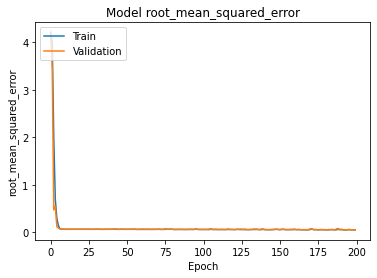

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

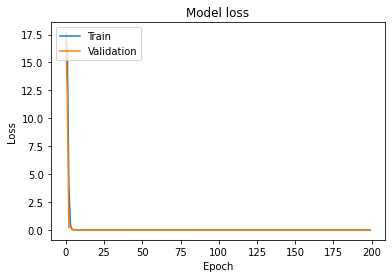

In [ ]:
plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 [==============================] - 1s 7ms/step


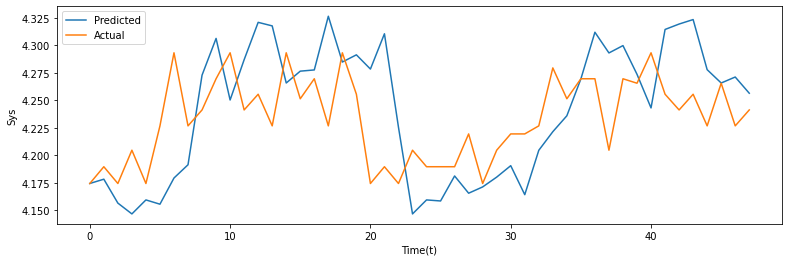

In [ ]:
# m1 = load_model(r"D:\dataset_fyp\lstm_models\temp1.h5")
bp2model.evaluate(X7_val,y7_val)
BP2_train_predictions = bp2model.predict(X7_train).flatten()
BP2_train_results = pd.DataFrame(data={'Train Predictions':BP2_train_predictions, 'Actuals':y7_train})
BP2_train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Sys")
plt.plot(BP2_train_results['Train Predictions'][0:48])
plt.plot(BP2_train_results['Actuals'][0:48])
plt.legend(['Predicted','Actual'])

In [ ]:
bp2_range = abs(BP2_train_predictions - y7_train)
print("Bp2 Ranges")
print("Min Bp2 Diff",bp2_range.min())
print("Max Bp2 Diff",bp2_range.max())
print("Mean Bp2 Diff",bp2_range.mean())

Bp2 Ranges
Min Bp2 Diff 2.2119600212811008e-05
Max Bp2 Diff 0.1430112782305839
Mean Bp2 Diff 0.04164351905540599


In [ ]:
newbpm = bpm.apply(np.log)
print(newbpm.head())

Date/Time
7/1/2022 0:00    4.201703
7/1/2022 1:00    4.201703
7/1/2022 2:00    4.201703
7/1/2022 3:00    4.186620
7/1/2022 4:00    4.186620
Name: BPM, dtype: float64


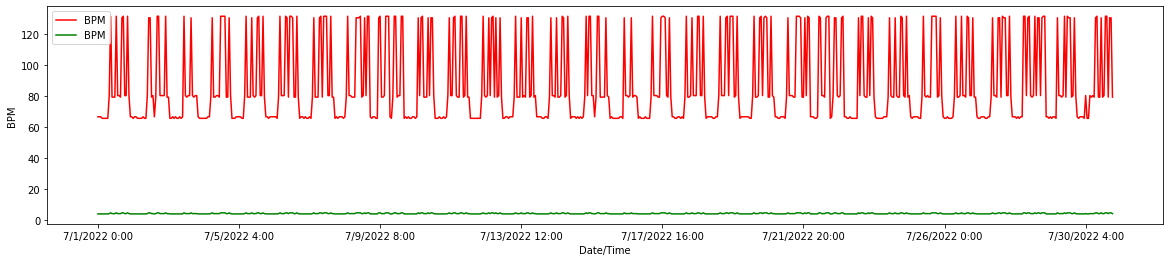

In [ ]:
plt.figure(figsize=(20,4)) 
plt.xlabel("Date-Time")
plt.ylabel("BPM")
bpm.plot(color='red')
# plt.figure(figsize=(20,4)) 
newbpm.plot(color='green')
plt.legend()

In [ ]:
WINDOW_SIZE = 3
X8, y8 = df_to_X_y(newbpm, WINDOW_SIZE)
print(X8.shape, y8.shape)

(717, 3, 1) (717,)


In [ ]:
X8_train = X8[0:500] 
y8_train = y8[0:500]
X8_val = X8[500:610]
y8_val = y8[500:610]
X8_test = X8[610:717]
y8_test = y8[610:717]
print(X8_train.shape, y8_train.shape, X8_val.shape, y8_val.shape, X8_test.shape, y8_test.shape)

(500, 3, 1) (500,) (110, 3, 1) (110,) (107, 3, 1) (107,)


In [ ]:
bpmmodel = Sequential()
bpmmodel.add(LSTM(128, activation='ReLU', input_shape=(3, 1), return_sequences=True))
bpmmodel.add(LSTM(64, activation='ReLU', return_sequences=True))
bpmmodel.add(LSTM(32, activation='ReLU', return_sequences=True))
bpmmodel.add(LSTM(16, activation='ReLU', return_sequences=False))
bpmmodel.add(Dense(1))
bpmmodel.compile(optimizer='Adam', loss='mse', metrics=RootMeanSquaredError())
bpmmodel.summary()

# bpmmodel = Sequential()
# bpmmodel.add(LSTM(86, activation='LeakyReLU', input_shape=(3, 1), return_sequences=False))
# #model1.add(LSTM(64, activation='LeakyReLU', return_sequences=True))
# #model.add(Dropout(0.1))
# bpmmodel.add(Dense(1))
# bpmmodel.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bpmmodel.summary()

# bpmmodel = Sequential()
# # bpmmodel.add(LSTM(256, activation='ReLU', input_shape=(3, 1), return_sequences=True))
# # bpmmodel.add(LSTM(64, activation='ReLU', input_shape=(3, 1), return_sequences=True))
# bpmmodel.add(LSTM(64, activation='ReLU', input_shape=(3, 1), return_sequences=True))
# bpmmodel.add(LSTM(32, activation='ReLU', return_sequences=True))
# bpmmodel.add(LSTM(16, activation='ReLU', return_sequences=False))
# # bpmmodel.add(Dense(256, activation='relu'))
# bpmmodel.add(Dense(1, activation='relu'))
# bpmmodel.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bpmmodel.summary()

# bpmmodel = Sequential()
# bpmmodel.add(LSTM(100, activation='ReLU', input_shape=(3, 1), return_sequences=True))
# bpmmodel.add(LSTM(64, activation='ReLU', return_sequences=True))
# bpmmodel.add(LSTM(32, activation='ReLU', return_sequences=False))
# bpmmodel.add(Dense(1))
# bpmmodel.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
# bpmmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_9 (LSTM)               (None, 3, 64)             49408     
                                                                 
 lstm_10 (LSTM)              (None, 3, 32)             12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = bpmmodel.fit(X8_train, y8_train, validation_data=(X8_val, y8_val), epochs=20)

Epoch 1/20
16/16 [==============================] - 12s 108ms/step - loss: 19.5641 - root_mean_squared_error: 4.4231 - val_loss: 19.4770 - val_root_mean_squared_error: 4.4133
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 18.7525 - root_mean_squared_error: 4.3304 - val_loss: 16.2428 - val_root_mean_squared_error: 4.0302
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 5.8340 - root_mean_squared_error: 2.4154 - val_loss: 0.3282 - val_root_mean_squared_error: 0.5729
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6834 - root_mean_squared_error: 0.8267 - val_loss: 0.5710 - val_root_mean_squared_error: 0.7557
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.3363 - root_mean_squared_error: 0.5799 - val_loss: 0.3013 - val_root_mean_squared_error: 0.5489
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.2180 - root_mean_squared_error: 0.4669 - val_loss: 0.2464 - val_

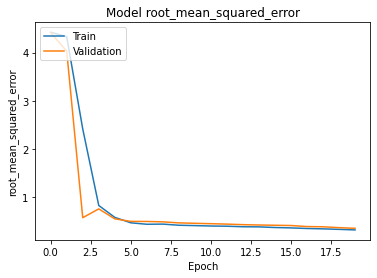

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

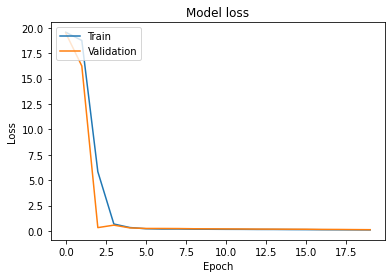

In [ ]:
plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 [==============================] - 1s 7ms/step


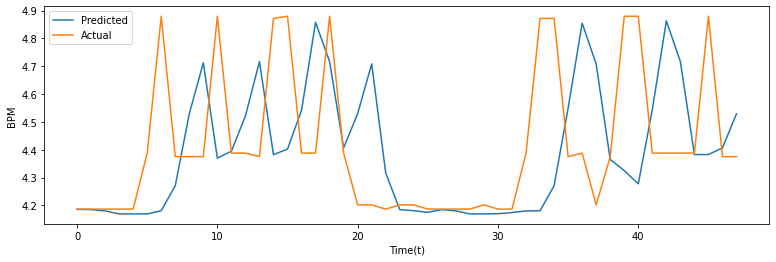

In [ ]:
# m1 = load_model(r"D:\dataset_fyp\lstm_models\temp1.h5")
bpmmodel.evaluate(X8_val,y8_val)
BPM_train_predictions = bpmmodel.predict(X8_train).flatten()
BPM_train_results = pd.DataFrame(data={'Train Predictions':BPM_train_predictions, 'Actuals':y8_train})
BPM_train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("BPM")
plt.plot(BPM_train_results['Train Predictions'][0:48])
plt.plot(BPM_train_results['Actuals'][0:48])
plt.legend(['Predicted','Actual'])

In [ ]:
bpm_range = abs(BPM_train_predictions - y8_train)
print("BPM Ranges")
print("Min BPM Diff",bpm_range.min())
print("Max BPM Diff",bpm_range.max())
print("Mean BPM Diff",bpm_range.mean())

BPM Ranges
Min BPM Diff 0.0009065471630584909
Max BPM Diff 0.6996970954903379
Mean BPM Diff 0.22274303329668005


In [ ]:
tempmodel.save("./log_models/tempmodel.h5")
bp1model.save("./log_models/bp1model.h5")
bp2model.save("./log_models/bp2model.h5")
bpmmodel.save("./log_models/bpmmodel.h5")